In [ ]:
import escape as esc
import numpy as np
import matplotlib.pyplot as plt
from escape.utils.widgets import show
esc.require("0.9.7")

In [ ]:
q = esc.var("Q")

# SAXS. Form-factors. OblateCoreShell

Original: https://www.ncnr.nist.gov/resources/sansmodels/OblateCoreShell.html

Author: Denis Korolkov

Calculates the form factor for an oblate ellipsoid particle with a core/shell structure. The form factor is averaged over all possible orientations of the ellipsoid.


## Parameters

Parameter|	Variable|	Value
---------|----------|----------
0|	Scale|	1.0
1|	Major Core Radius (Å)|	200.0
2|	Minor Core Radius (Å)|	20.0
3|	Major Shell Radius (Å)|	250.0
4|	Minor Shell Radius (Å)|	30.0
5|	Contrast (core-shell) ($Å^{-2}$)|	1.0e-6
6|	Contrast (shell-solvent) (Å^{-2})|	1.0e-6
7|	Incoherent Background (cm-1)|	0.0



## Usage notes

The function calculated is:

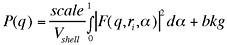

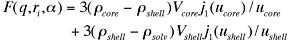

where 





and 

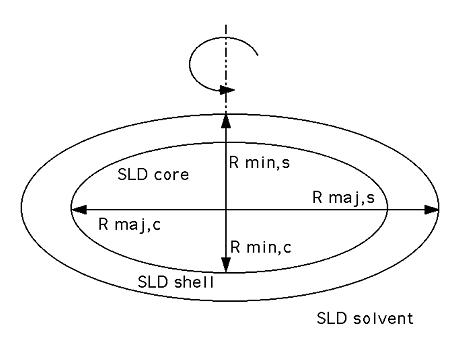

## Reference

Kotlarchyk, M.; Chen, S.-H. J. Chem. Phys., 1983, 79, 2461.

Berr, S. J. Phys. Chem., 1987, 91, 4760.


In [ ]:
#Definition of parameters
I0 = esc.par("Scale", 1, scale=1e8, fixed=True)

RCmaj = esc.par("Major Core Radius", 200, units=esc.angstr)
RCmin = esc.par("Minor Core Radius", 20, units=esc.angstr)
RSmaj = esc.par("Major Shell Radius", 250, units=esc.angstr)
RSmin = esc.par("Minor Shell Radius", 30, units=esc.angstr)

rho_cs = esc.par("Core-Shell SLD", 1, scale=1e-6, units=f"{esc.angstr}⁻²")
rho_ss = esc.par("Shell-Solvent SLD", 1, scale=1e-6, units=f"{esc.angstr}⁻²")
bkgr = esc.par("Background", 0.0, userlim=[0, 0.03])

#Model equations

#rotation angle
alpha = esc.var("alpha")



Vc = 4/3 * np.pi*RCmin*RCmaj**2
Vs = 4/3 * np.pi*RSmin*RSmaj**2

Uc = q*esc.sqrt((RCmaj**2*(1-alpha**2)+RCmin**2*alpha**2))
Us = q*esc.sqrt((RSmaj**2*(1-alpha**2)+RSmin**2*alpha**2))

Jc = (esc.sin(Uc)-Uc*esc.cos(Uc))/Uc**2
Js = (esc.sin(Us)-Us*esc.cos(Us))/Us**2

F = 3*Vc*rho_cs*Jc/Uc+3*Vs*rho_ss*Js/Us

P = I0/Vs*esc.integral(F*F, alpha, 0, 1, maxiter=100, epsrel=1e-8, epsabs=1e-8)+bkgr

show(P, coordinates=np.linspace(0.001, 0.7, 128), figtitle="CoreShell", 
     xlog=True, ylog=True, xlabel=f"Q [{esc.angstr}⁻¹]", ylabel="P(q)[cm⁻¹]")